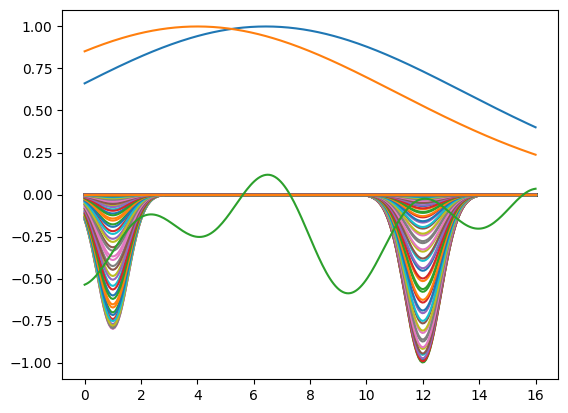

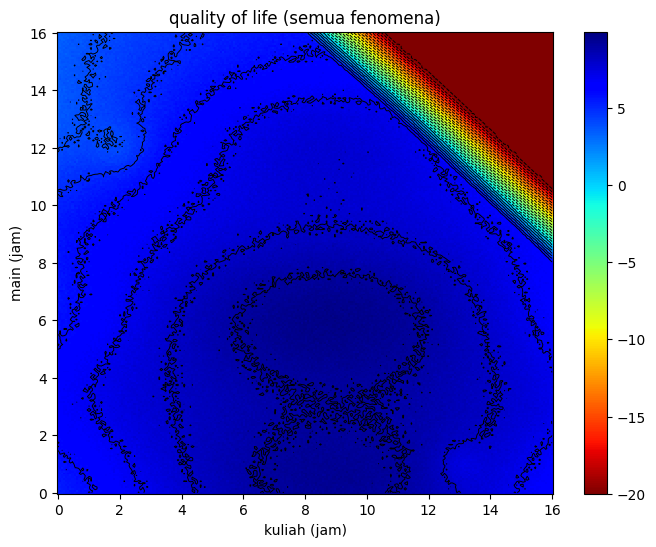

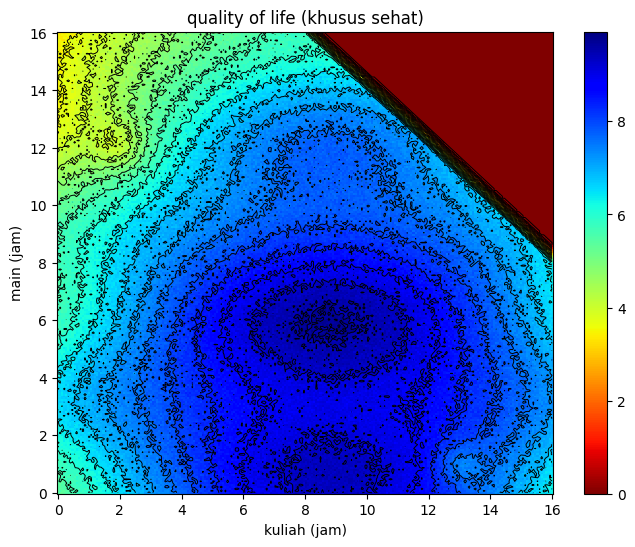

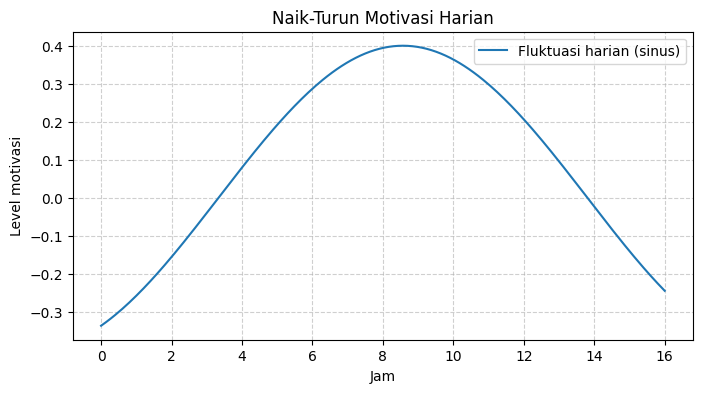

In [12]:
# Analisis Numerik T04
# Nama: Indy Dzakiyyatul M.
# NPM: 24083010076

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

istirahat= 8 # istirahat yang cukup

# Grid setup
xmin, xmax, ymin, ymax = 0, 24-istirahat, 0, 24-istirahat
res = 240
x = np.linspace(xmin, xmax, res) # kuliah
y = np.linspace(ymin, ymax, res) # main
X, Y = np.meshgrid(x, y)

# kuliah
plt.plot(x, np.exp(-((x -((45.0/7)))**2) / (10**2))) # kuliah
kuliah_pref = np.exp(-((x -(9.0))**2) / (10**2))

# bermain, game, instagram, tiktok, dlsb
plt.plot(y, np.exp(-((y -4.0)**2) / (10**2))) # main
main_pref = np.exp(-((Y - 4.0)**2) / (10**2))

# kalau total siklus main-kerja lebih dari 24 jam, merusak ritme sirkadian
total_waktu = X + Y
total_penalty = 0.2 * np.exp(total_waktu / 24.0)  # stronger, narrower penalty
#plt.plot(x, -total_penalty)

# terlena
kebanyakan_main = 1 * np.exp(-((X - 2.0)**2 + (Y - 12.0)**2) / 0.8)   # kebanyakan main
plt.plot(x, -kebanyakan_main)
# burnout
kebanyakan_lembur = 0.8 * np.exp(-((X - 13.0)**2 + (Y - 1.0)**2) / 0.6)  # kebanyakan lembur
plt.plot(y, -kebanyakan_lembur )

# naik-turun motivasi harian
NPM = 76
np.random.seed(NPM)
plt.plot(x, 0.4 * np.sin((0.3 * x)-1) * np.cos(1.0 * y) -0.2)
ripple = 0.4 * np.sin((0.3 * X)-1) * np.cos(1.0 * Y) -0.2
noise = np.random.normal(loc=0.0, scale=0.1, size=X.shape)
ripple += noise

# objective function
# quality of life
# edit preferensi di sini, tiap orang bisa beda prioritas
Z = 10.0 * (0.6 * kuliah_pref + 0.4 * main_pref)
Z = Z - kebanyakan_main - kebanyakan_lembur - total_penalty + ripple

# clip tidak lebih dari 24 jam
Z -= 10.0 * np.maximum(total_waktu - 24.0, 0.0)

# clip fenomena semua
Z_clip = np.clip(Z, -20, 20)
plt.figure(figsize=(8, 6))
c = plt.pcolormesh(X, Y, Z_clip, cmap='jet_r', shading='auto')
contours = plt.contour(X, Y, Z_clip, levels=30, colors='black', linewidths=0.7)
plt.colorbar(c)
plt.xlabel("kuliah (jam)")
plt.ylabel("main (jam)")
plt.title("quality of life (semua fenomena)")

# clip fenomena 'sehat'
Z_clip = np.clip(Z, 0, 10)
plt.figure(figsize=(8, 6))
c = plt.pcolormesh(X, Y, Z_clip, cmap='jet_r', shading='auto')
contours = plt.contour(X, Y, Z_clip, levels=30, colors='black', linewidths=0.7)
plt.colorbar(c)
plt.xlabel("kuliah (jam)")
plt.ylabel("main (jam)")
plt.title("quality of life (khusus sehat)")

# VISUALISASI RIPPLE MOTIVASI
plt.figure(figsize=(8, 4))
plt.plot(x, 0.4 * np.sin((0.3 * x) - 1), label="Fluktuasi harian (sinus)")
plt.title(f"Naik-Turun Motivasi Harian")
plt.xlabel("Jam")
plt.ylabel("Level motivasi")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

## TUGAS

In [ ]:
# TUGAS
## 1) mainkan paramter-parameter (ambang batas jam, jam istirahat harian, pengali/pembagi eksponen)
### 1a) plot grafik-grafik secara berdampingan untuk membandingkan skalanya
## 2) tambahkan faktor-faktor ke objective function (jika perlu)
## 3) temukan titik optimum sesuai diri masing-masing, temukan secara 'numerik', sebisa mungkin jangan pakai np.argmax
## 4) buat cerita aktivitas harian sesuai, bagaimana agar lebih baik/sehat (poin 4 paling penting)

### - global optimum,
#### idx = np.unravel_index(np.argmax(Z_clip), Z_clip.shape)
#### opt_x, opt_y, opt_z = X[idx], Y[idx], Z_clip[idx]

In [2]:
# 1. PARAMETER YANG BISA DIMAINKAN
NPM = 76
np.random.seed(NPM)

istirahat = 6.0       # jam tidur (ubah ke 6, 7, 8 untuk lihat pengaruhnya)
scale_kuliah = 0.7    # bobot preferensi kuliah
scale_main = 0.4      # bobot preferensi main
penalty_factor = 0.3  # faktor hukuman kalau kebanyakan
decay = 10.0          # penyebaran kurva Gaussian
res = 200             # resolusi grid
max_total = 24.0      # jam per hari

# SETUP GRID
xmin, xmax = 0, 24 - istirahat
ymin, ymax = 0, 24 - istirahat
x = np.linspace(xmin, xmax, res)  # jam kuliah
y = np.linspace(ymin, ymax, res)  # jam main

# FUNGSI PREFERENSI & PENALTI
kuliah_pref = np.exp(-((X - 7.0)**2) / (decay**2))
main_pref   = np.exp(-((Y - 4.0)**2) / (decay**2))
total_waktu = X + Y
total_penalty = penalty_factor * np.exp(total_waktu / 24.0)
kebanyakan_main = np.exp(-((X - 2.0)**2 + (Y - 10.0)**2) / 0.8)
kebanyakan_lembur = 0.8 * np.exp(-((X - 12.0)**2 + (Y - 1.0)**2) / 0.6)
ripple = 0.4 * np.sin((0.3 * X) - 1) * np.cos(1.0 * Y) - 0.2
ripple += np.random.normal(loc=0.0, scale=0.05, size=X.shape)

Waktu kuliah: paling baik di kisaran 6–9 jam, terlalu sedikit atau terlalu lama bisa menurunkan kualitas.
Waktu Main: idealnya sekitar di 3–4 jam, cukup untuk refreshing tanpa berlebihan.
Penalty Total Waktu: semakin banyak total jam kuliah + main, makin besar nilai penaltinya.
Penalty Kebanyakan Main: jika waktu main lebih dari 10 jam, kualitas hidup turun drastis.
Penalty Kebanyakan Lembur: kuliah lebih dari 12 jam berisiko bikin burnout.
Aktivitas Nonton Film: semakin banyak sisa waktu, makin besar peluang untuk nonton (maksimal 2 jam).


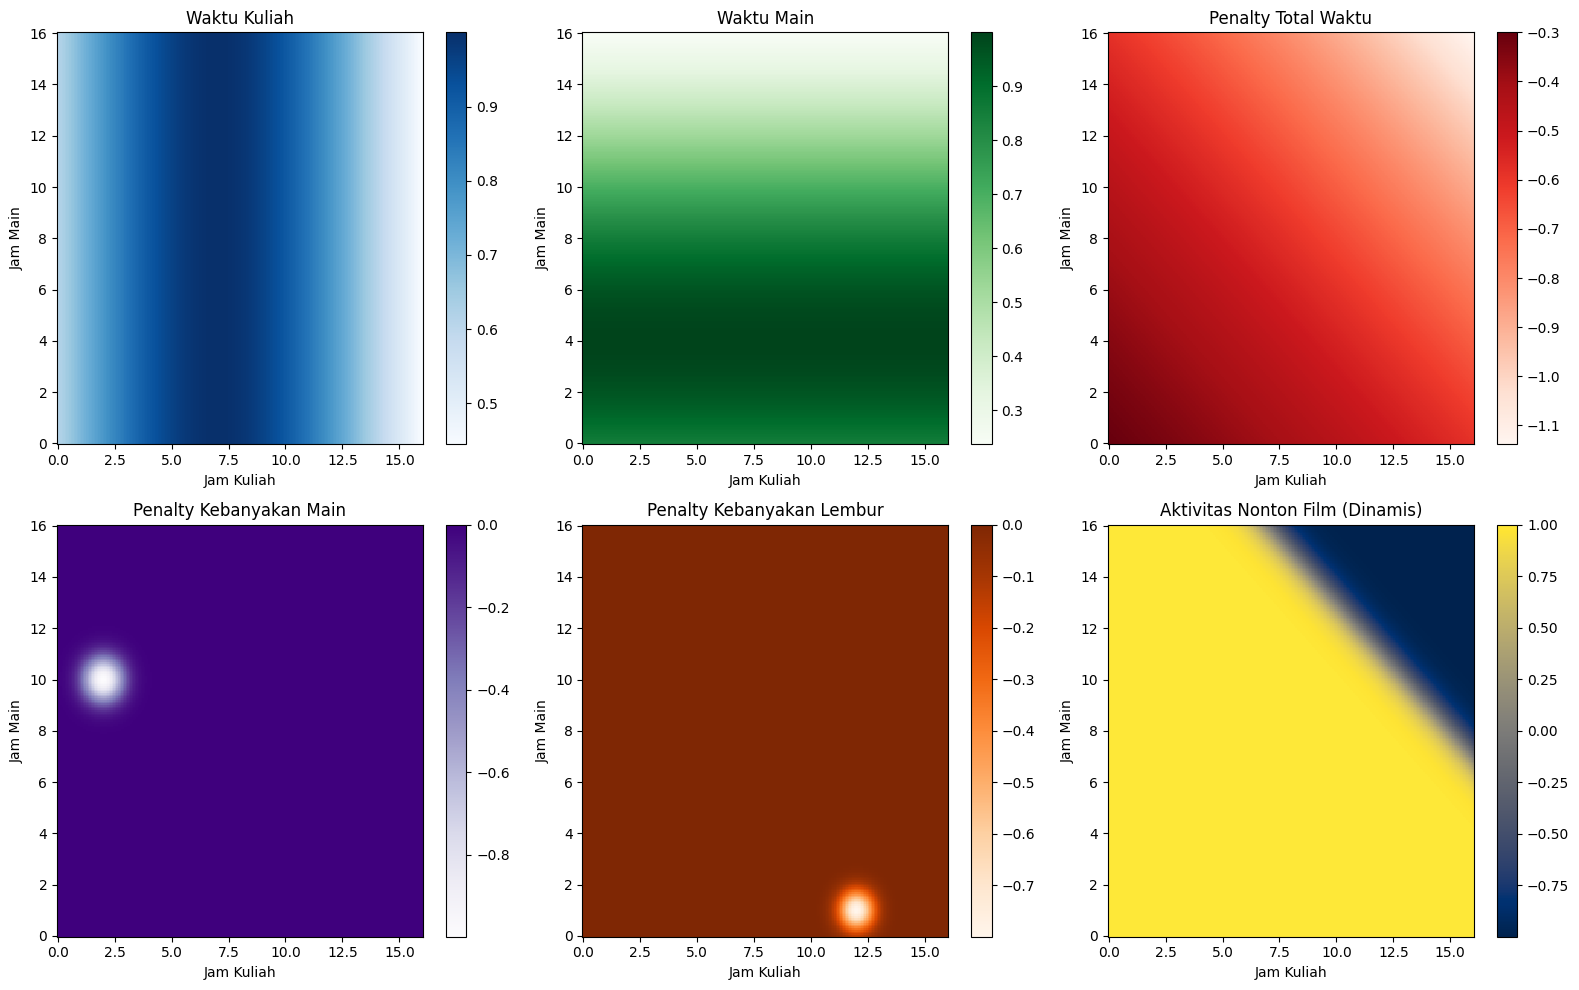

In [6]:
# 2. TAMBAHAN FAKTOR
scale_nonton = 2.0
menonton_film = np.tanh((max_total - (X + Y) - 1.0))

# OBJECTIVE FUNCTION
Z = 10.0 * (scale_kuliah * kuliah_pref + scale_main * main_pref)
Z = Z - kebanyakan_main - kebanyakan_lembur - total_penalty + ripple
Z += scale_nonton * menonton_film
Z -= 10.0 * np.maximum(total_waktu - 24.0, 0.0)
Z_clip = np.clip(Z, -20, 20)

# PLOT GRAFIK PERBANDINGAN
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

axes[0,0].set_xlabel("Jam Kuliah")
axes[0,0].set_ylabel("Jam Main")
c1 = axes[0,0].pcolormesh(X, Y, kuliah_pref, cmap='Blues', shading='auto')
axes[0,0].set_title("Waktu Kuliah")
fig.colorbar(c1, ax=axes[0,0])
print("Waktu kuliah: paling baik di kisaran 6–9 jam, terlalu sedikit atau terlalu lama bisa menurunkan kualitas.")

axes[0,1].set_xlabel("Jam Kuliah")
axes[0,1].set_ylabel("Jam Main")
c2 = axes[0,1].pcolormesh(X, Y, main_pref, cmap='Greens', shading='auto')
axes[0,1].set_title("Waktu Main")
fig.colorbar(c2, ax=axes[0,1])
print("Waktu Main: idealnya sekitar di 3–4 jam, cukup untuk refreshing tanpa berlebihan.")

axes[0,2].set_xlabel("Jam Kuliah")
axes[0,2].set_ylabel("Jam Main")
c3 = axes[0,2].pcolormesh(X, Y, -total_penalty, cmap='Reds', shading='auto')
axes[0,2].set_title("Penalty Total Waktu")
fig.colorbar(c3, ax=axes[0,2])
print("Penalty Total Waktu: semakin banyak total jam kuliah + main, makin besar nilai penaltinya.")

axes[1,0].set_xlabel("Jam Kuliah")
axes[1,0].set_ylabel("Jam Main")
c4 = axes[1,0].pcolormesh(X, Y, -kebanyakan_main, cmap='Purples', shading='auto')
axes[1,0].set_title("Penalty Kebanyakan Main")
fig.colorbar(c4, ax=axes[1,0])
print("Penalty Kebanyakan Main: jika waktu main lebih dari 10 jam, kualitas hidup turun drastis.")

axes[1,1].set_xlabel("Jam Kuliah")
axes[1,1].set_ylabel("Jam Main")
c5 = axes[1,1].pcolormesh(X, Y, -kebanyakan_lembur, cmap='Oranges', shading='auto')
axes[1,1].set_title("Penalty Kebanyakan Lembur")
fig.colorbar(c5, ax=axes[1,1])
print("Penalty Kebanyakan Lembur: kuliah lebih dari 12 jam berisiko bikin burnout.")

axes[1,2].set_xlabel("Jam Kuliah")
axes[1,2].set_ylabel("Jam Main")
c7 = axes[1,2].pcolormesh(X, Y, menonton_film, cmap='cividis', shading='auto')
axes[1,2].set_title("Aktivitas Nonton Film (Dinamis)")
fig.colorbar(c7, ax=axes[1,2])
print("Aktivitas Nonton Film: semakin banyak sisa waktu, makin besar peluang untuk nonton (maksimal 2 jam).")

plt.tight_layout()
plt.show()

Quality of Life (Semua Faktor):
 • Merupakan hasil gabungan dari preferensi aktivitas, penalti, dan dinamika motivasi.

Quality of Life (Zona Sehat):
 • Visualisasi yang dibatasi pada rentang nilai 0–10 agar fokus pada skor yang relevan dan realistis.



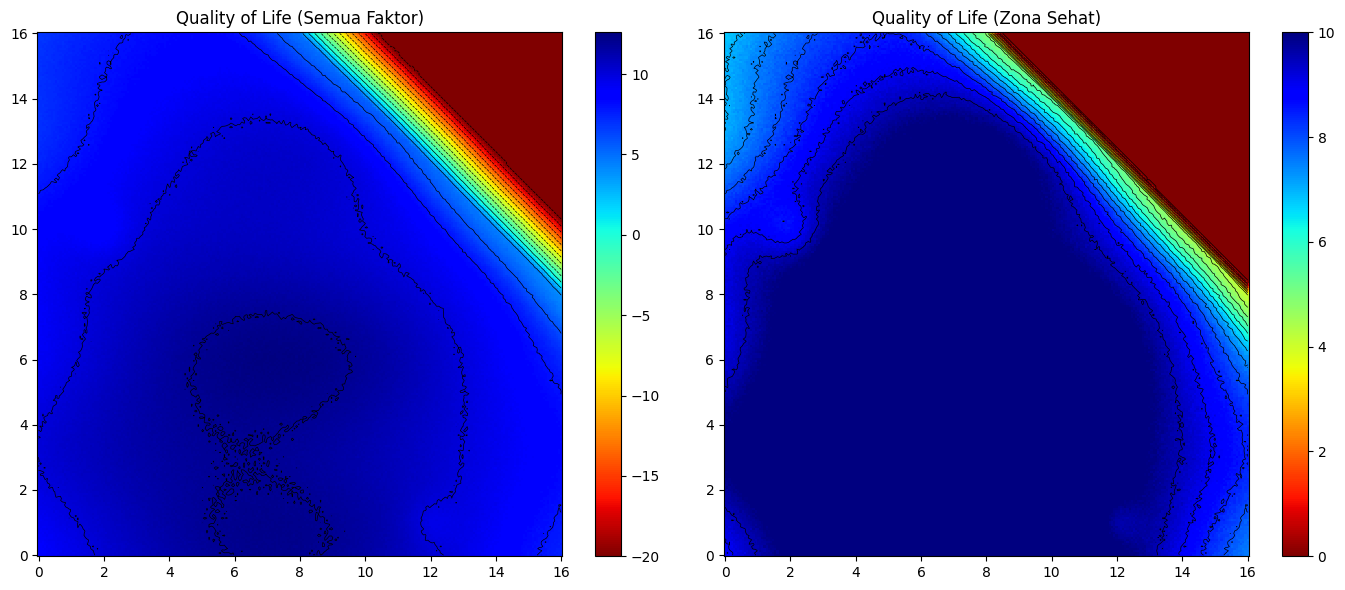

In [11]:
# VISUALISASI AKHIR QUALITY OF LIFE
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

c1 = axes[0].pcolormesh(X, Y, Z_clip, cmap='jet_r', shading='auto')
axes[0].contour(X, Y, Z_clip, levels=20, colors='black', linewidths=0.5)
axes[0].set_title("Quality of Life (Semua Faktor)")
fig.colorbar(c1, ax=axes[0])

c2 = axes[1].pcolormesh(X, Y, np.clip(Z, 0, 10), cmap='jet_r', shading='auto')
axes[1].contour(X, Y, np.clip(Z, 0, 10), levels=20, colors='black', linewidths=0.5)
axes[1].set_title("Quality of Life (Zona Sehat)")
fig.colorbar(c2, ax=axes[1])

print("Quality of Life (Semua Faktor):")
print(" • Merupakan hasil gabungan dari preferensi aktivitas, penalti, dan dinamika motivasi.\n")

print("Quality of Life (Zona Sehat):")
print(" • Visualisasi yang dibatasi pada rentang nilai 0–10 agar fokus pada skor yang relevan dan realistis.\n")

plt.tight_layout()
plt.show()

In [9]:
# 3. TEMUKAN TITIK OPTIMUM (NUMERIK)
tidur_opt  = 8
opt_x, opt_y, opt_z = None, None, -np.inf
for i in range(Z_clip.shape[0]):
    for j in range(Z_clip.shape[1]):
        if Z_clip[i, j] > opt_z:
            opt_x, opt_y, opt_z = X[i, j], Y[i, j], Z_clip[i, j]
print(f"Titik optimum: Kuliah {opt_x:.2f} jam, Main {opt_y:.2f} jam, Skor {opt_z:.2f}\n")

Titik optimum: Kuliah 6.63 jam, Main 6.16 jam, Skor 12.60



In [10]:
# 4. AKTIVITAS HARIAN (OPTIMASI)
kuliah_opt = round(opt_x)
main_opt   = round(opt_y)
lain_opt = round(24 - (kuliah_opt + main_opt + tidur_opt))

print("Simulasi Hasil Pola Harian Seimbang (Optimasi)\n")
print(f"- Tidur sekitar {tidur_opt} jam memberikan waktu yang cukup untuk memulihkan energi tubuh.")
print(f"- Sekitar {kuliah_opt} jam dialokasikan untuk kuliah atau belajar, sehingga tetap fokus tanpa berlebihan.")
print(f"- Hiburan atau aktivitas santai lain mendapat porsi {main_opt} jam, cukup untuk menyegarkan pikiran.")
print("- Sisa waktu bisa dipakai untuk kebutuhan penting lainnya seperti makan, olahraga, dan aktivitas sosial.")
print("Pola ini membantu menjaga keseimbangan, meningkatkan motivasi, dan mencegah kelelahan.\n")

Simulasi Hasil Pola Harian Seimbang (Optimasi)

- Tidur sekitar 8 jam memberikan waktu yang cukup untuk memulihkan energi tubuh.
- Sekitar 7 jam dialokasikan untuk kuliah atau belajar, sehingga tetap fokus tanpa berlebihan.
- Hiburan atau aktivitas santai lain mendapat porsi 6 jam, cukup untuk menyegarkan pikiran.
- Sisa waktu bisa dipakai untuk kebutuhan penting lainnya seperti makan, olahraga, dan aktivitas sosial.
Pola ini membantu menjaga keseimbangan, meningkatkan motivasi, dan mencegah kelelahan.



### Aktivitas harian saya
- Pagi (04.30): Bangun pagi
- Pagi (06.00 - 07.00): Prepare ngampus
- Pagi (07.00 - 07.15): OTW ke kampus
- Pagi (07.30 - 12.30): Kuliah
- Siang (12.30 - 13.30): Makan siang & istirahat
- Siang (13.30 - 16.00): Lanjut kuliah
- Sore (16.00 - 16.15): Pulang
- Sore (16.30- 18.00): Bersih-bersih
- Sore sampe malam (18.00 - 20.00): Main sosmed
- malam (20.00 - 22.00): Belajar dan mengerjakan tugas
- malam (22.00 - 00.00): Main sosmed
- malam (00.00 - 04.30) Tidur